<a href="https://colab.research.google.com/github/talseuzer/Tubes_UAS/blob/main/Tugas_Pra_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- Kelompok : IF7 - Scrapy
- Anggota : </br>
10122238 - TITAN EL HAQI</br>
10122241 - MARSYA AWLIYA SABRINA</br>
10122254 - ARIQ HIKARI HIDAYAT</br>
10122257 - M.GHAZY AL H.H</br>
10122260 - ADISYA AINUN FATIHAH</br>
10122264 - MUHAMMAD NAUFAL GHIFARI </br>

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan jumlah peminjaman sepeda antara tahun 2011 dan 2012? (10122238 - Titan El Haqi)
2. Apakah ada penurunan signifikan dalam penggunaan sepeda saat cuaca buruk? (10122241 - Marsya Awliya Sabrina)
3. Apakah ada pengaruh hari libur terhadap jumlah sepeda yang disewa? (10122254 - Ariq Hikari Hidayat)
4. Apa pengaruh faktor cuaca terhadap jumlah sewa sepeda harian? (10122257 - M. Ghazy Al H. H.)
5. Bagaimana cara mendeteksi peristiwa atau anomali dalam data penyewaan sepeda? (10122260 - Adisya Ainun Fatihah)
6. Bagaimana Distribusi Waktu Peminjaman Sepeda? (10122264 - Muhammad Naufal Ghifari)

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# menentukan dataset apa yang akan dipakai
day_df = pd.read_csv('https://ariqhikari.github.io/data/bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('https://ariqhikari.github.io/data/bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# memeriksa missing-values/duplikat
# menentukan atribut yang akan dipakai

#### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
# jika ada missing-values/duplikat, tentukan ingin diapakan (transformasi/hapus)

#### Membersihkan tabel `day_df`

##### Duplicate data

In [14]:
day_df.duplicated().sum()

0

In [15]:
day_df.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [17]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Memperbaiki tipe data

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
# eksplor data

In [36]:
# Filter cnt dan dteday dari dataset
dteday_cnt = day_df.groupby('dteday')
cpy = dteday_cnt['cnt'].sum().reset_index() #count per year

# Ups bagi 2, jadi 2011 dan 2012
cnt2011 = cpy[cpy['dteday'].dt.year == 2011]
cnt2012 = cpy[cpy['dteday'].dt.year == 2012]

# Jumlahkan total penyewa
total2011 = cnt2011['cnt'].sum()
total2012 = cnt2012['cnt'].sum()

In [27]:
# Menghitung rata-rata jumlah sewa sepeda berdasarkan kondisi cuaca
average_rentals_by_weather = day_df.groupby('weathersit')['cnt'].mean().reset_index()

In [28]:
# Tren harian (NAUFAL)
daily_trend = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Tren musiman (berdasarkan hari dalam seminggu)
weekly_seasonal_trend = hour_df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

In [29]:
# Pisahkan data menjadi dua kelompok: hari libur dan bukan hari libur
holiday_data = hour_df[hour_df['holiday'] == 1]
non_holiday_data = hour_df[hour_df['holiday'] == 0]

# Hitung rata-rata jumlah sepeda yang disewa pada hari libur dan bukan hari libur
avg_rental_holiday = holiday_data['cnt'].mean()
avg_rental_non_holiday = non_holiday_data['cnt'].mean()

In [30]:
# Hitung rata-rata dan standar deviasi bergulir dari jumlah penyewaan sepeda
rolling_mean = day_df['cnt'].rolling(window=30).mean()
rolling_std = day_df['cnt'].rolling(window=30).std()

# Identifikasi anomali sebagai titik yang lebih dari 3 standar deviasi dari rata-rata bergulir
anomalies = day_df[abs(day_df['cnt'] - rolling_mean) > 3 * rolling_std]

In [31]:
# Filter data untuk cuaca buruk (misalnya, weathersit 3 dan 4)
bad_weather_data = hour_df[hour_df['weathersit'].isin([3, 4])]

# Hitung total rental sepeda untuk setiap jam pada cuaca buruk
total_rentals_bad_weather = bad_weather_data.groupby('hr')['cnt'].sum()

# Hitung total rental sepeda untuk setiap jam pada semua kondisi cuaca
total_rentals_all_weather = hour_df.groupby('hr')['cnt'].sum()

# Hitung persentase penurunan dalam penggunaan sepeda saat cuaca buruk
percentage_reduction = ((total_rentals_all_weather - total_rentals_bad_weather) / total_rentals_all_weather) * 100

## Visualization & Explanatory Analysis

###Pertanyaan 1:

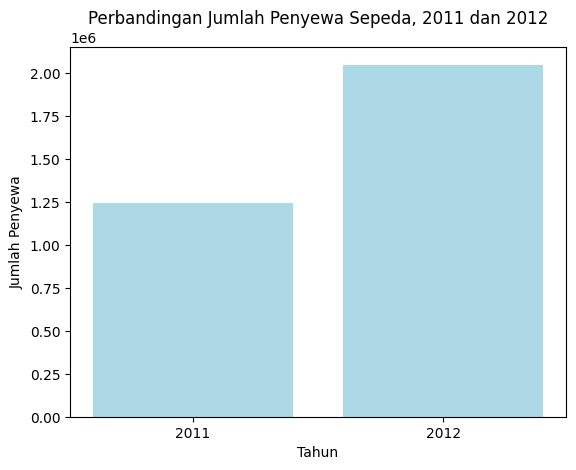

In [44]:
plt.bar(['2011','2012'], [total2011, total2012], color='lightblue')

plt.title('Perbandingan Jumlah Penyewa Sepeda, 2011 dan 2012')
plt.ylabel('Jumlah Penyewa')
plt.xlabel('Tahun')
plt.show()

###Pertanyaan 2:

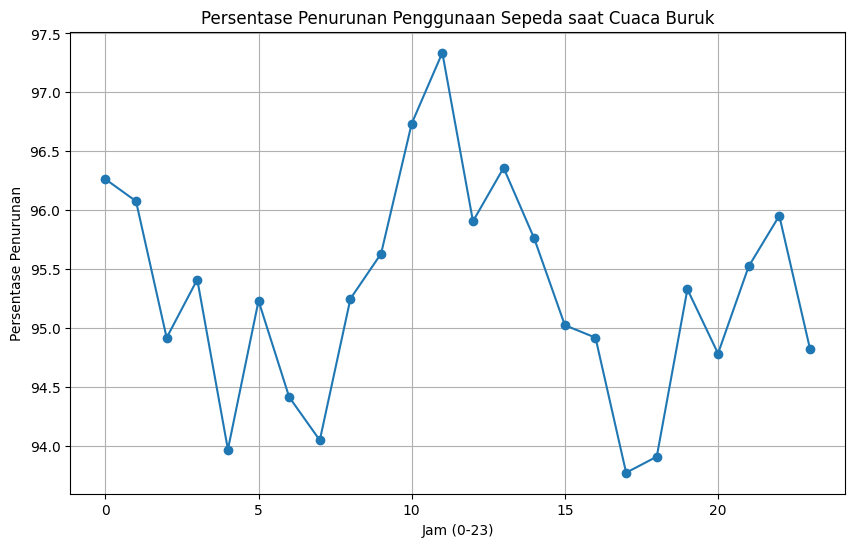

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(percentage_reduction, marker='o')
plt.title('Persentase Penurunan Penggunaan Sepeda saat Cuaca Buruk')
plt.xlabel('Jam (0-23)')
plt.ylabel('Persentase Penurunan')
plt.grid(True)
plt.show()

### Pertanyaan 3:

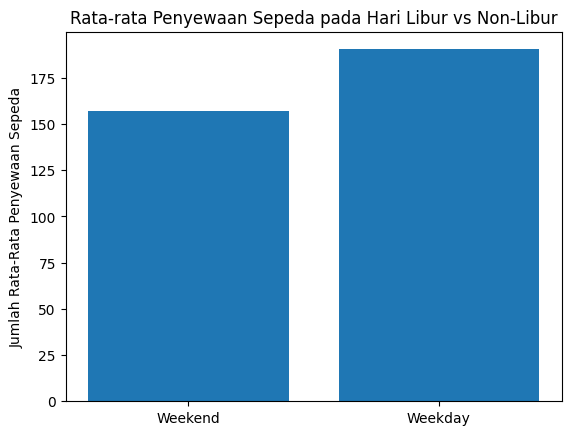

In [39]:
plt.bar(['Weekend', 'Weekday'], [avg_rental_holiday, avg_rental_non_holiday])
plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur vs Non-Libur')
plt.ylabel('Jumlah Rata-Rata Penyewaan Sepeda')
plt.show()

### Pertanyaan 4

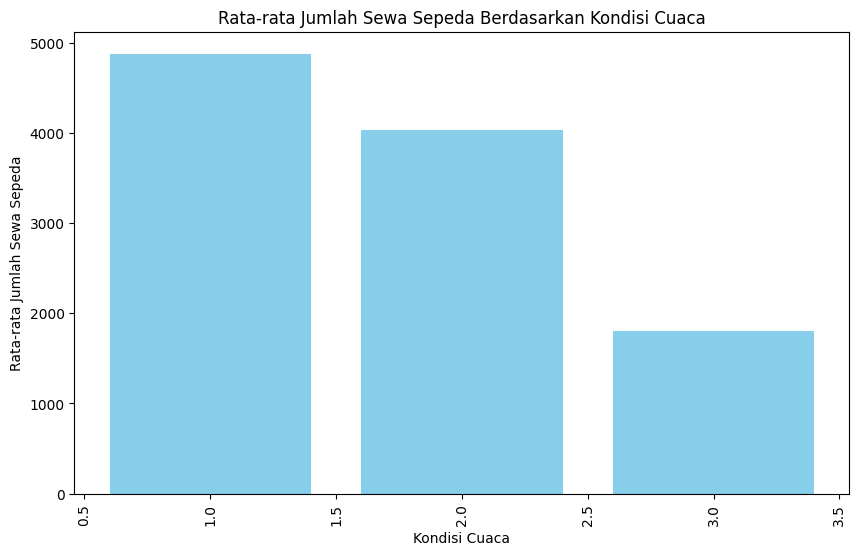

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(average_rentals_by_weather['weathersit'], average_rentals_by_weather['cnt'], color='skyblue')
plt.title('Rata-rata Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 5:

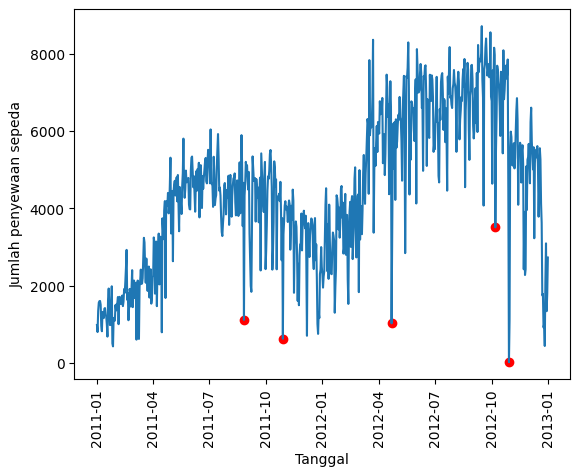

In [41]:
plt.plot(day_df['dteday'], day_df['cnt'])
plt.scatter(anomalies['dteday'], anomalies['cnt'], c='red')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah penyewaan sepeda')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 6:

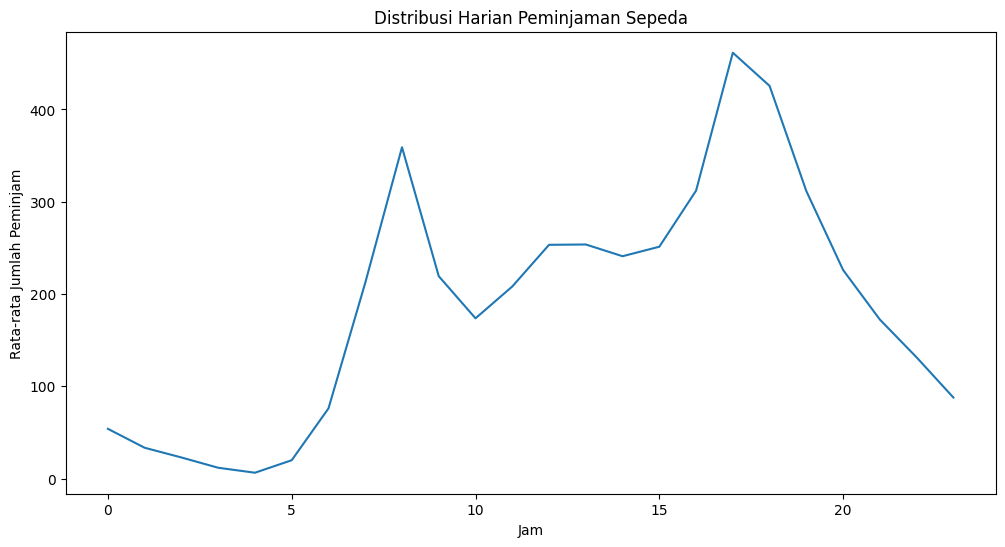

In [42]:
#Visualisasi harian
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=daily_trend, errorbar=None)
plt.title('Distribusi Harian Peminjaman Sepeda')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.show()

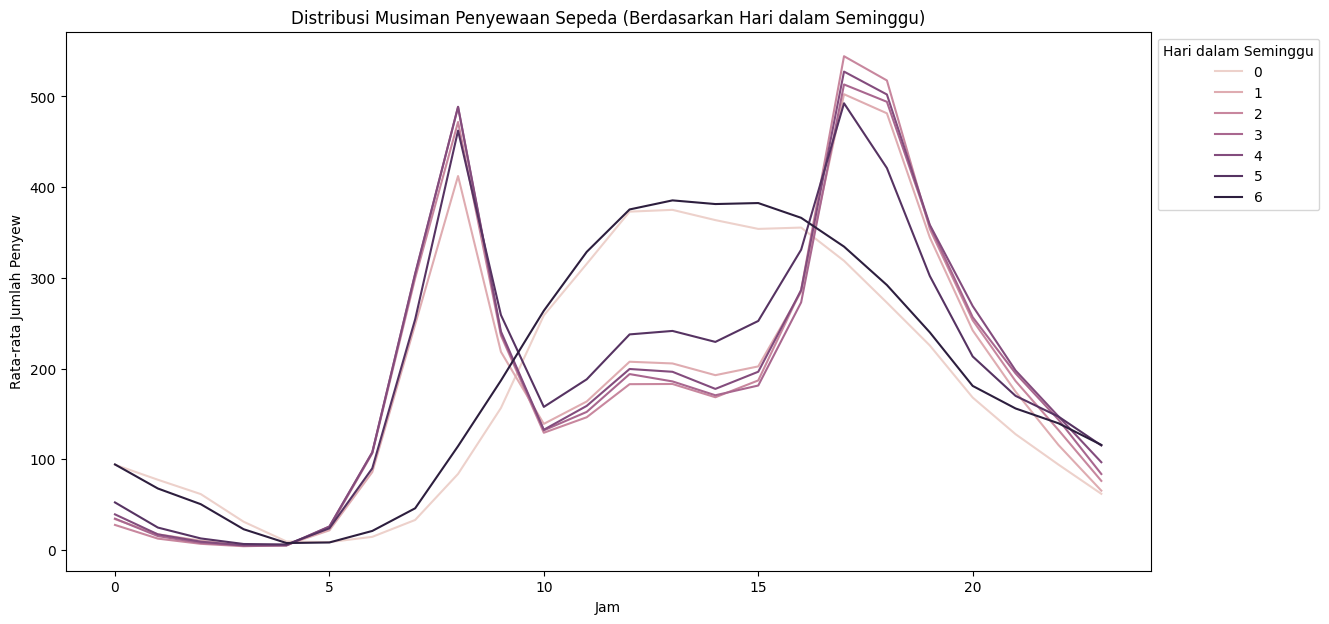

In [43]:
#Visualisasi musiman
plt.figure(figsize=(14, 7))
sns.lineplot(x='hr', y='cnt', hue='weekday', data=weekly_seasonal_trend, errorbar=None)
plt.title('Distribusi Musiman Penyewaan Sepeda (Berdasarkan Hari dalam Seminggu)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyew')
plt.legend(title='Hari dalam Seminggu', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Conclusion

<!-- menyimpulkan dari pertanyaan bisnis, analisis data, dan visualisasi data nya -->
- Conclution pertanyaan 1<br>
Dilihat dari analisis pada dataset Bike Sharing, terdapat peningkatan jumlah penyewa dari tahun 2011 ke tahun 2012 sebanyak 64.87%. Hasil ini didapatkan dari mengambil selisih penyewa pada tahun 2011 dan 2012, kemudian dibagi dengan total penyewa pada tahun 2011.
- Conclution pertanyaan 2<br>
Berdasarkan analisis menggunakan dataset sepeda, tampaknya ada potensi penurunan signifikan dalam penggunaan sepeda saat cuaca buruk. Analisis dilakukan dengan membandingkan total rental sepeda untuk setiap jam pada kondisi cuaca buruk dengan total rental sepeda pada semua kondisi cuaca. Hasilnya dapat divisualisasikan dalam bentuk grafik persentase penurunan penggunaan sepeda pada berbagai jam. Kesimpulan akhirnya bergantung pada pola yang terlihat dalam grafik tersebut.
- Conclution pertanyaan 3<br>
Berdasarkan analisis data, terdapat perbedaan yang signifikan dalam rata-rata jumlah sepeda yang disewa antara hari libur dan bukan hari libur. Visualisasi menunjukkan bahwa rata-rata peminjaman sepeda lebih tinggi pada hari-hari yang bukan hari libur. Oleh karena itu, dapat disimpulkan bahwa hari libur memiliki pengaruh terhadap pola peminjaman sepeda, dengan potensi menurunnya permintaan pada hari libur dibandingkan dengan hari-hari biasa.
- Conclution pertanyaan 4<br>
Kondisi cuaca berpengaruh pada jumlah sewa sepeda harian, dan kondisi cuaca yang lebih baik cenderung meningkatkan jumlah sewa sepeda. Namun, cuaca sedang memiliki variasi yang lebih besar dalam jumlah sewa.
- Conclution pertanyaan 5<br>
Peristiwa atau anomali dalam data penyewaan sepeda dapat dideteksi menggunakan berbagai teknik, seperti metode statistik, algoritma pembelajaran mesin, atau algoritma pembelajaran tidak terbimbing. Salah satu metode sederhana dan mudah diterapkan adalah dengan menggunakan standar deviasi bergulir. Standar deviasi bergulir adalah rata-rata dari standar deviasi dari serangkaian data dalam periode waktu tertentu. Standar deviasi bergulir dapat digunakan untuk melacak perubahan dalam variabilitas data dari waktu ke waktu, dan untuk mengidentifikasi anomali.
- Conclution pertanyaan 6<br>
Terdapat peningkatan peminjaman pada jam-jam tertentu, khususnya selama periode sibuk pergi dan pulang kerja.